# Linear model for Boston

You try to process a very similar dataset to the lecture. This time the house prices are from Portland and are relatively recent.

## Portland Housing Prices/Sales Jul 2020 - Jul 2021
- https://www.kaggle.com/datasets/threnjen/portland-housing-prices-sales-jul-2020-jul-2021
- 348 columns
- 25681 records

To make things easier, only some columns were selected from the original dataset and the number of records was also significantly reduced.

!!! For this reason, the subset created may not statistically match the original dataset.

A bonus task is to process the original dataset.

## Sub dataset
- Data = structure with filled data
- m = number of rows = 100
- x's = input variable / features
- y's = output variable / target
- (x, y) = one row from training dataset
- x(2) = (4, 5, 3374, 85)
- y(2) = 1 050 000

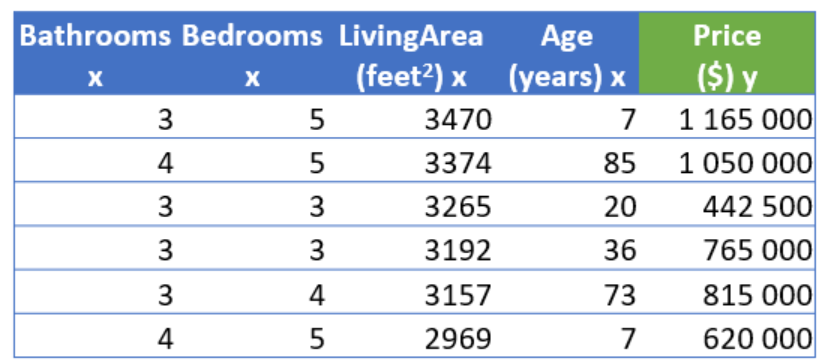

# Task
- Create a regression linearization model from the parameters you selected last exercise
- Standardize the data before processing
- Create the model manually
- Create the model using scikit-learn

# Data loading

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv ("..\\dataset\\portland_filtered.csv",  sep=';')

# Linear model without using libraries
- Create a linear regression model manually without the help of external libraries
- List its parameters
- List its scores for training and validation data
- Plot a learning history graph
- Visualize the model

# Linear model using scikit-learn
- Create a linear regression model manually without the help of external libraries
- List its parameters
- List its scores for training and validation data
- Plot a learning history graph
- Visualize the model